# Imports 

In [1]:
import numpy as np
import ipynb.fs.full.PrepareData as data
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 14%|█▍        | 6/43 [00:00<00:00, 53.38it/s]

[178, 37, 3062, 2854, 3127, 3466, 3663, 4011, 3906, 3768, 3411, 2748, 2674]
2 chs: 178 entries
3 chs: 37 entries
4 chs: 3062 entries
5 chs: 2854 entries
6 chs: 3127 entries
7 chs: 3466 entries
8 chs: 3663 entries
9 chs: 4011 entries
10 chs: 3906 entries
15 chs: 3768 entries
20 chs: 3411 entries
30 chs: 2748 entries
40 chs: 2674 entries


 88%|████████▊ | 38/43 [00:04<00:00,  7.25it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 15.87it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 93%|█████████▎| 40/43 [00:04<00:00,  8.27it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 95%|█████████▌| 41/43 [00:04<00:00,  6.96it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:03,  8.57it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 93%|█████████▎| 40/43 [00:06<00:00,  6.71it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 95%|█████████▌| 41/43 [00:06<00:00,  5.47it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 23%|██▎       | 10/43 [00:00<00:02, 16.48it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:04<00:02,  4.14it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:05<00:00,  5.71it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 95%|█████████▌| 41/43 [00:05<00:00,  4.92it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 18.36it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 93%|█████████▎| 40/43 [00:05<00:00,  6.18it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:05<00:00,  7.79it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['LassoCV', 'ElasticNetCV', 'Ridge', 'GradientBoostingRegressor', 'RidgeCV'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fig, axis = plt.subplots(2, figsize = (10, 10))
    #fig.suptitle("One regressor per amplifier - {} amplifiers".format(data.ampNumber), fontsize = 20)
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Gain test error", fontsize = 18)
    axis[0].xaxis.set_tick_params(labelsize = 14)
    axis[0].set_ylim(0, 5)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Loss test error", fontsize = 18)
    axis[1].xaxis.set_tick_params(labelsize = 14)
    axis[1].set_xticklabels(strategyArray, rotation = -45, ha = 'left')
    axis[1].set_ylim(0, 5)

    fig.text(0.08, 0.5, 'Mean Absolute error (dB)', va='center', rotation='vertical', fontsize = 18)

    plt.gcf().subplots_adjust(bottom = 0.15)
    fig.savefig("../../graphs/perAmp-{}amps.eps".format(data.ampNumber), format = 'eps', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
X, y = data.loadDataset()
X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = 0)

count = 1

In [6]:
from sklearn.linear_model import LassoCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(LassoCV())
    
    param_grid = {
        'estimator__selection': ['cyclic', 'random'],
        'estimator__alphas': [np.logspace(-4, -0.5, 30)]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 2])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - LassoCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.7529255853133479 +- 0.7585121932753053
Loss error: 1.8115553337572634 +- 0.8464203566323137


In [7]:
from sklearn.linear_model import ElasticNetCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(ElasticNetCV())
    
    param_grid = {
        'estimator__selection': ['cyclic', 'random'],
        'estimator__l1_ratio': [.1, .5, .7, 1]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 2])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - ElasticNetCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.7508520359967923 +- 0.7597963989890322
Loss error: 1.8168278227640267 +- 0.8496478638109946


In [8]:
from sklearn.linear_model import Ridge

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(Ridge())
    
    param_grid = {
        'estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'estimator__max_iter': [500, 1000, 2000]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 2])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - Ridge".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.751660988344262 +- 0.7649123417848521
Loss error: 1.7969798809514812 +- 0.8456531086411972


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(GradientBoostingRegressor())
    
    param_grid = {
        'estimator__learning_rate': [.1, .5, .7, 1],
        'estimator__n_estimators': [10, 50, 100],
        'estimator__subsample': [.1, .5, .7, 1]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 2])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - GradientBoostingRegressor".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.7272469913669115 +- 0.8037040007159839
Loss error: 1.8101496688150644 +- 0.8587074963419077


In [10]:
from sklearn.linear_model import RidgeCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(RidgeCV())
    
    param_grid = {
        'estimator__cv': [5, 10],
        'estimator__fit_intercept': [True, False]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 2])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - RidgeCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.7563605262096738 +- 0.7744448459844759
Loss error: 1.7896483379199348 +- 0.8657367004292916


In [11]:
from sklearn.dummy import DummyRegressor

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(DummyRegressor())
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - DummyRegressor".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 2.191240763546798 +- 0.6720355898800108
Loss error: 2.1957512315270935 +- 0.7126071328160642


dict_keys(['LassoCV', 'ElasticNetCV', 'Ridge', 'GradientBoostingRegressor', 'RidgeCV'])


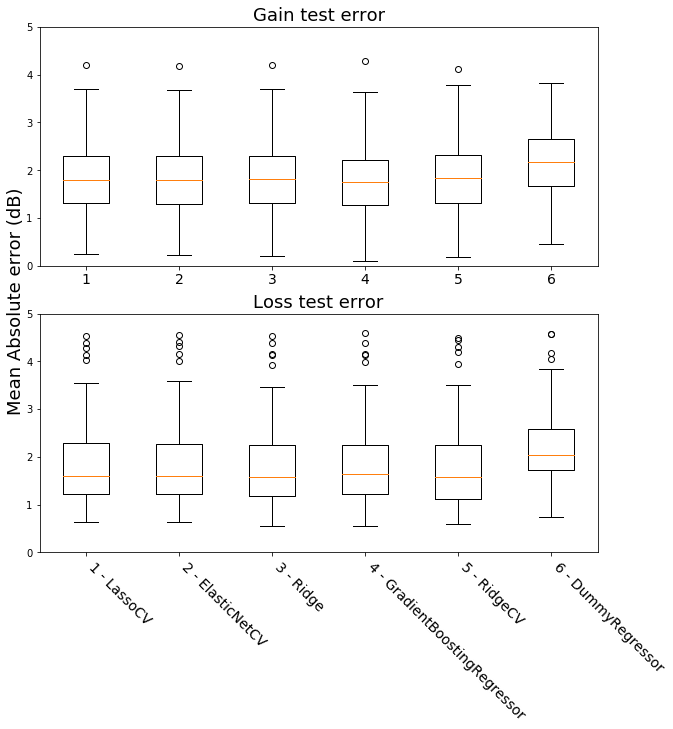

In [12]:
print(sortedDict.keys())
plotGrid(errorArray[0], errorArray[1])